## 张量

In [36]:
from __future__ import print_function
import torch

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[3.8897e-38, 0.0000e+00, 3.8897e-38],
        [0.0000e+00, 3.8897e-38, 0.0000e+00],
        [1.5414e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.4842e-44]])


In [3]:
print_function()

_Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 65536)

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0292, 0.8382, 0.9716],
        [0.3573, 0.1257, 0.8563],
        [0.3512, 0.5293, 0.4131],
        [0.9976, 0.2896, 0.8619],
        [0.1382, 0.4594, 0.1807]])


In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [7]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [10]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.8135, 0.4804, 0.9415],
        [0.4087, 0.2993, 0.2372],
        [0.8895, 0.4269, 0.7632],
        [0.6349, 0.2665, 0.6299],
        [0.4340, 0.5321, 0.5363]])


In [12]:
print(x.size())

torch.Size([5, 3])


## 运算

In [13]:
y = torch.rand(5, 3)
print(x + y)

tensor([[1.5595, 1.1592, 1.5925],
        [1.2889, 0.3915, 1.1786],
        [1.7732, 1.0669, 1.6853],
        [1.0571, 0.7827, 1.3284],
        [0.4541, 1.2130, 1.5198]])


In [14]:
print(torch.add(x, y))

tensor([[1.5595, 1.1592, 1.5925],
        [1.2889, 0.3915, 1.1786],
        [1.7732, 1.0669, 1.6853],
        [1.0571, 0.7827, 1.3284],
        [0.4541, 1.2130, 1.5198]])


In [16]:
result = torch.empty(5, 3)
torch.add(x, y, alpha=10, out=result)

tensor([[ 8.2736,  7.2685,  7.4515],
        [ 9.2104,  1.2209,  9.6511],
        [ 9.7259,  6.8271,  9.9843],
        [ 4.8570,  5.4282,  7.6152],
        [ 0.6347,  7.3415, 10.3712]])

In [18]:
y.add_(x, alpha=5)
print(y)

tensor([[5.6270, 3.5610, 6.2999],
        [3.3325, 1.8880, 2.3648],
        [6.2208, 3.2014, 5.5014],
        [4.2317, 2.1153, 4.4777],
        [2.6240, 3.8736, 4.2015]])


In [19]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [23]:
print(y)

tensor([ 1.1635,  0.4175,  0.1192, -0.9599, -0.7656,  1.1099, -2.9559, -0.6883,
         0.4287, -0.3842,  1.4293, -0.7989, -1.4625,  0.0688,  1.5964,  0.6536])


In [24]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.0134])
0.0133533189073205


## 桥接Numpy

In [25]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [26]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [27]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [30]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA上的张量

In [38]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))

tensor([1.0134], device='cuda:0')
tensor([1.0134], dtype=torch.float64)


## Autograd:自动求导

In [39]:
import torch

In [44]:
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [46]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [47]:
print(y.grad_fn)

In [71]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [72]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [55]:
a = torch.randn(2, 2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


## 梯度

In [73]:
out.backward()

In [74]:
print(x.grad)

tensor([[22.5000, 22.5000],
        [22.5000, 22.5000]])


In [84]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([1215.2783, -141.0114, 1393.6881], grad_fn=<MulBackward0>)


In [85]:
x

tensor([ 0.5934, -0.0689,  0.6805], requires_grad=True)

In [86]:
v = torch.tensor([0.5934, -0.0689,  0.6805], dtype=torch.float)

In [87]:
y.backward(v)

In [88]:
print(x.grad)

tensor([1215.2832, -141.1072, 1393.6639])


In [89]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


# 神经网络

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## 定义网络

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [3]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [11]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1757,  0.0112,  0.0318, -0.1669,  0.1095, -0.1060,  0.0741,  0.0487,
          0.0820, -0.0439]], grad_fn=<AddmmBackward>)


In [12]:
net.zero_grad()
out.backward(torch.randn(1, 10))

## 损失函数

In [16]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5506, grad_fn=<MseLossBackward>)


In [21]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # Relu

## 反向传播

In [22]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0093,  0.0079,  0.0157, -0.0005, -0.0021, -0.0176])


## 更新权重

In [25]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [35]:
print(net.conv1.bias.grad)

tensor([ 0.0117, -0.0034,  0.0008,  0.0020,  0.0056, -0.0036])


In [28]:
import torch.optim as optim

In [31]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

In [32]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # Relu

# 训练分类器

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

## 加载数据集

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


## 可视化图片

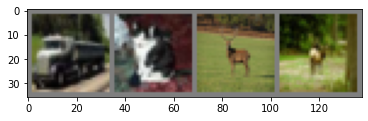

truck   cat  deer  deer


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [35]:
images[1].shape

torch.Size([3, 32, 32])

## 定义卷积网络

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

## 定义损失函数

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
nn.MSELoss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 训练网络

In [37]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        print(outputs.shape)
        print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
        if i % 2000 == 1999:
            print('{},{} loss:{:.3f}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
print("Finished Training")

torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Si

torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Si

torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Si

torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Si

torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Size([4])
torch.Size([4, 10])
torch.Si

KeyboardInterrupt: 

In [28]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## 测试网络

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 输出图
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

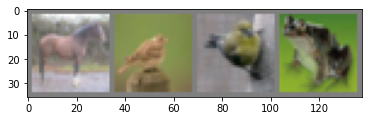

GroundTruth:  horse  bird  bird  frog


In [29]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 输出图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [30]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [31]:
outputs = net(images)

In [33]:
_, predicted = torch.max(outputs, 1)

print('Predicted:', ' '.join('%5s' % classes[j] for j in predicted))

Predicted: horse  bird  bird  deer
